---
<h1><B> Deep Learning (AI2100/AI5100)  </h1></B></center>

---

<table>
<tr> 
<td><h3> Assignment : </td>
<td><h3> 1 </td>
</tr>
<tr> 
<td><h3> Name : </td>
<td><h3> Manan Darji </td>
</tr>
<tr> 
<td><h3> Roll Number : </td>
<td> <h3>CS22MTECH14004 </td>
</tr>
<table>

---

# Que 1
## Perceptron learning algorithm
[10 = dataset creation 2 + perceptron learning algorithm 5 + analysis 3]
Implement perceptron learning algorithm for classifying a linearly separable dataset in 2D. Note
that you have to create such a dataset with at least 1000 data points. Plot the dataset before and
after training (with the classifier).
Discuss your observations with respect to number of iterations required for perfect classification (k)
by varying the level of separability (γ from the class discussions) in the dataset. (Hint: compute
the average value of k for each level of γ, and do this for about 5 values of γ. Observe if you can
relate to the result discussed in class)

# Explanation


### ANSWER: 


## Separability vs Modification required

* From below images of diffrent runs we can see that as Separability(γ) increse number of step to modify w decrese for a perfect classification.


---

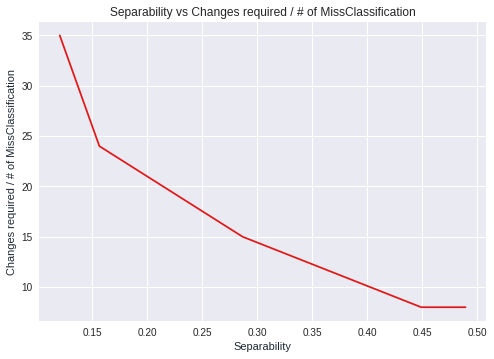
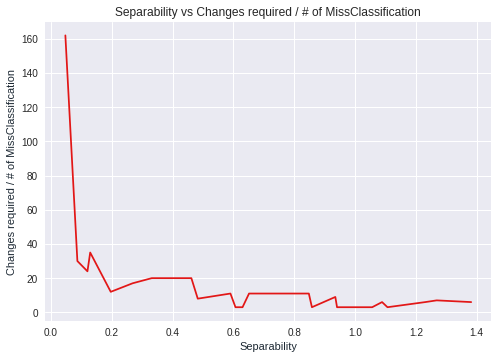



---



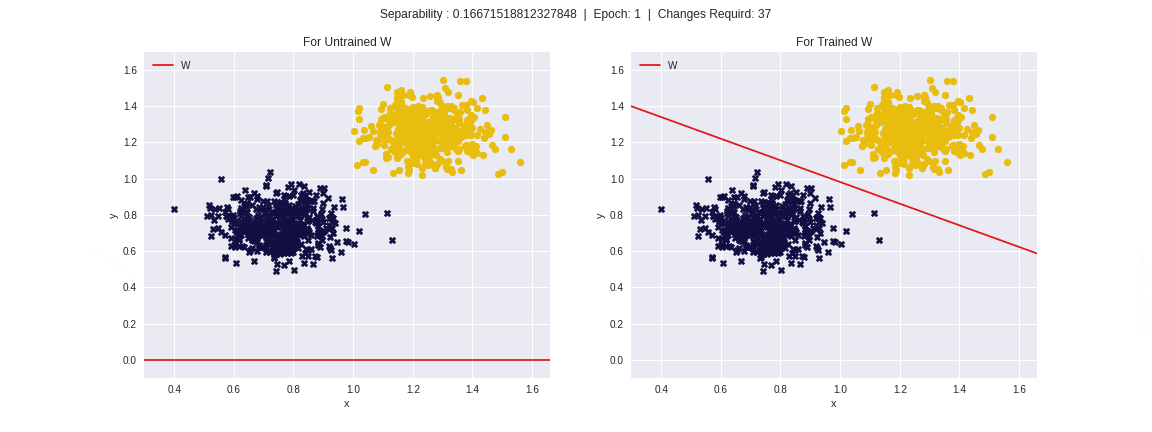

# Code:

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import math
import imageio # to create gif not relevant
import sklearn.datasets

In [2]:
# To set plot style
plt.style.use('seaborn')

In [3]:
# This is just to set all the variables to double in order to avoid any error in the future. 
torch.set_default_dtype(torch.double)

In [4]:
def Gen_Data(a,b,e):
  u1 = a # Mean 1
  u2 = b # Mean 2
  E  = e # Sigma

  # Here I am generating 2 classes each with 500 points.
  D1 = torch.normal( u1, E, size = [500,2] )
  D2 = torch.normal( u2, E, size = [500,2] )

  # Just Plotting the Data 
  # plt.scatter(D1[:,0], D1[:,1])
  # plt.scatter(D2[:,0], D2[:,1])
  # plt.show()

  return (D1,D2)

def Gen_XY(D1,D2):
  # Here I am merging 2 input class into X in an alternate position 
  # Here I have added 1 extra column for bias 
  X=torch.empty(1000,D1.size(1)+1).fill_(1) 
  X[::2,:2] = D1
  X[1::2,:2] = D2

  # Similar for Y
  Y=torch.empty(1000,1)
  Y[::2,:1] = 1.0
  Y[1::2,:1] = -1.0

  return (X,Y)

In [5]:
def Plot_Multi_Graph(X,D1,D2,W,K,Epoch,title = "Plot",Save_name = "test"):
  """
  This is a Ploting Function i used to plot a graph with and without seperaion boundry.
  """
  # Here I am getting max and min limit from dataset
  a = min(X[:,0]) - 0.1
  ay = min(X[:,1]) - 0.1
  b = max(X[:,0]) + 0.1
  by = max(X[:,1]) + 0.1

  # few points in range
  x = np.linspace(a,b,50)

  # Calculate y [For Seperation boundry]
  y1 = np.zeros(50,) 
  y2 = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())


  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6))
  # Plot Labels
  fig.suptitle(title + "  |  Epoch: "+str(Epoch) + "  |  Changes Requird: "+str(K))
  ax1.set_title("For Untrained W")
  ax1.set_xlabel('x', color='#1C2833')
  ax1.set_ylabel('y', color='#1C2833')
  ax1.set_xlim(a,b)
  ax1.set_ylim(-0.1,by)
  #Plotting Data
  ax1.scatter(D1[:,0], D1[:,1] ,c="#120E43" ,marker='X')
  ax1.scatter(D2[:,0], D2[:,1] ,c="#E8BD0D" ,marker='o')


  # check for weather to show W [Seperation boundry] 
  ax1.plot(x, y1, color='#E21717', label='W')
  ax1.legend(loc='upper left')

  ax2.set_title("For Trained W")
  ax2.set_xlabel('x', color='#1C2833')
  ax2.set_ylabel('y', color='#1C2833')
  ax2.set_xlim(a,b)
  ax2.set_ylim(-0.1,by)
  #Plotting Data
  ax2.scatter(D1[:,0], D1[:,1] ,c="#120E43" ,marker='X')
  ax2.scatter(D2[:,0], D2[:,1] ,c="#E8BD0D" ,marker='o')

  # check for weather to show W [Seperation boundry]
  ax2.plot(x, y2, color='#E21717', label='W')
  ax2.legend(loc='upper left')

  # plt.grid()
  if(Save_name != "test"):
    fig.savefig(Save_name)

  plt.show()



In [6]:
def Perceptron(x, y, w, Max_Epochs):  

  cnt = 0;
  print("Number of changes in each iteration: ")
  k = 0
  # Loop till Max number of epoch.
  for e in range(Max_Epochs):
    NoOfChanges = 0
    # Iterate over whole dataset
    for i in range(x.size(0)):
      # If missclassifide update w
      if x[i].dot(w) * y[i] <= 0:
        w = w + y[i] * x[i]
        NoOfChanges = NoOfChanges + 1
        k = k + 1

    if NoOfChanges == 0:
      print('\nEarly stopping at epoch number %d'%e) 
      break

    if(e%10==0): # new line every 10 iter
      print()

    # Printing currunt miss classifications.
    print("%2d"%(e+1),"-->","%2d"%NoOfChanges ,"|", end = " ")  
    cnt+=1
  # At last print epch required.

  # print('\nNumber of Iteration (K): %d'%cnt)  
  print('\n\"Data Might Not be Linearly Separable\"') if(cnt == Max_Epochs) else print()
  return (w,k,cnt)

In [7]:
def separability(D1, D2):
  """
  This is a function that is a simple implementation to find out the min euclidean distance between two distribution.
  In O(n^2)
  """
  min_dist = float('inf')
  for d1 in D1:
    x1 = d1[0].item()
    y1 = d1[1].item()
    for d2 in D2:
      x2 = d2[0].item()
      y2 = d2[1].item()
      dist = ((x1 - x2)**2 + (y1 - y2)**2)**0.5
      min_dist = min(dist, min_dist)
  return min_dist

__________________________________________________________________________________________________________________________________
Separability in Data(γ): 0.4363753481168238
Number of changes in each iteration: 

 1 -->  8 | 
Early stopping at epoch number 1

No of changes required : 8
No of Epoch required   : 1


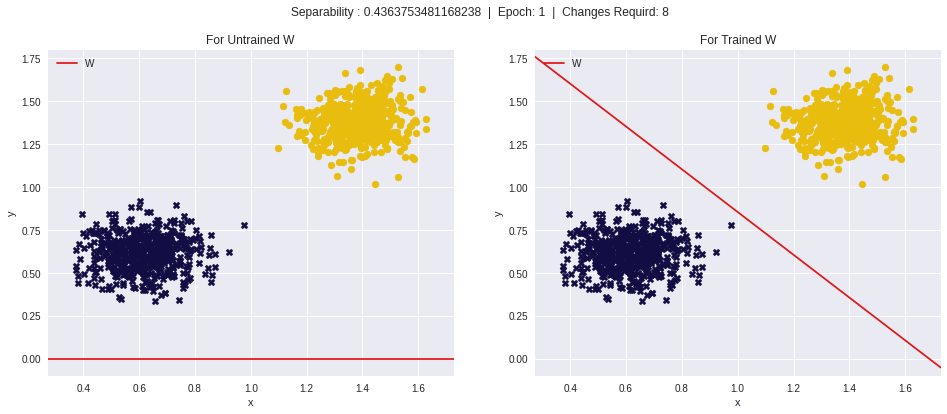

__________________________________________________________________________________________________________________________________
Separability in Data(γ): 0.48554396771636155
Number of changes in each iteration: 

 1 --> 13 | 
Early stopping at epoch number 1

No of changes required : 13
No of Epoch required   : 1


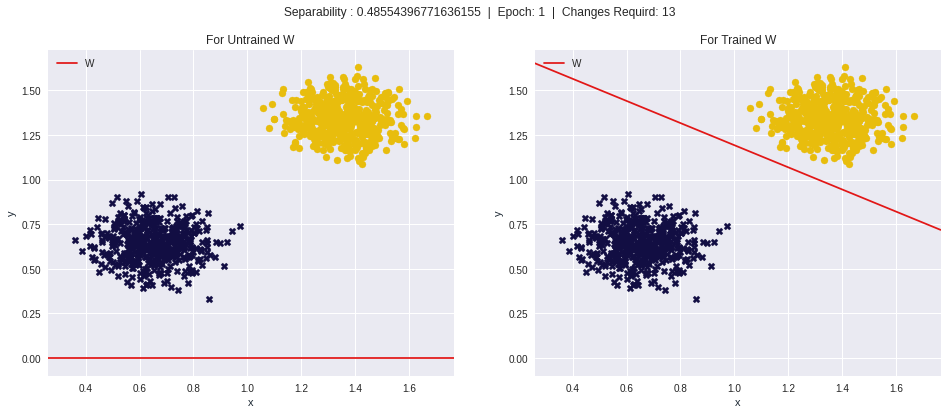

__________________________________________________________________________________________________________________________________
Separability in Data(γ): 0.3328088172398276
Number of changes in each iteration: 

 1 --> 22 | 
Early stopping at epoch number 1

No of changes required : 22
No of Epoch required   : 1


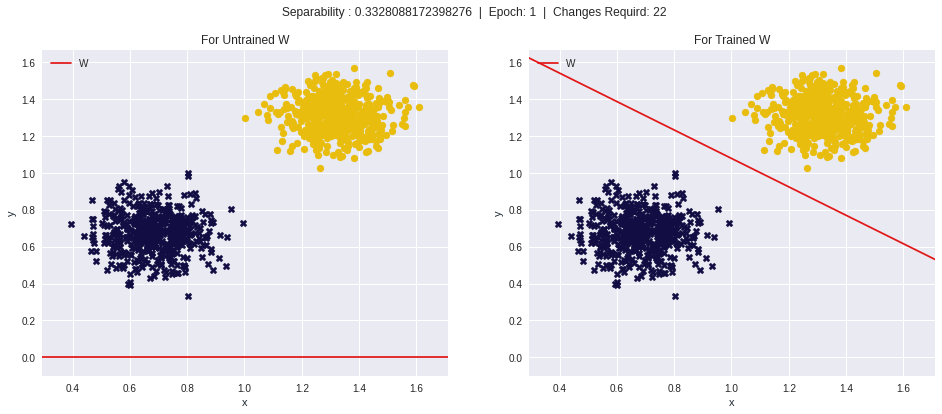

__________________________________________________________________________________________________________________________________
Separability in Data(γ): 0.3228466044952792
Number of changes in each iteration: 

 1 --> 17 | 
Early stopping at epoch number 1

No of changes required : 17
No of Epoch required   : 1


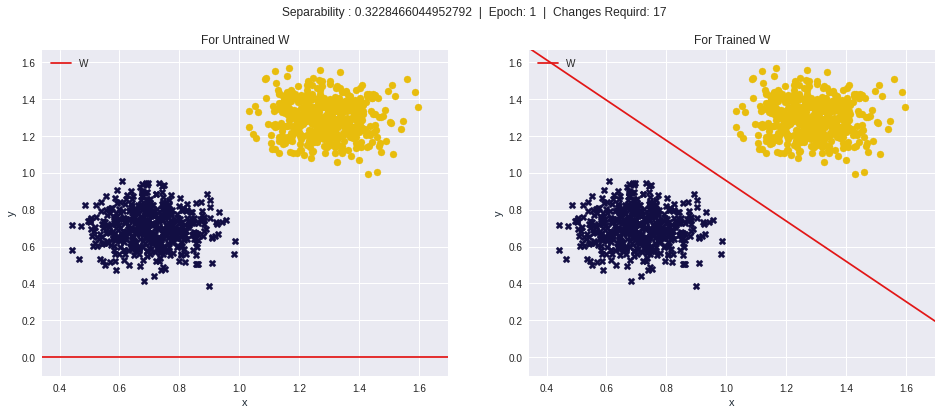

__________________________________________________________________________________________________________________________________
Separability in Data(γ): 0.15766867371127738
Number of changes in each iteration: 

 1 --> 35 | 
Early stopping at epoch number 1

No of changes required : 35
No of Epoch required   : 1


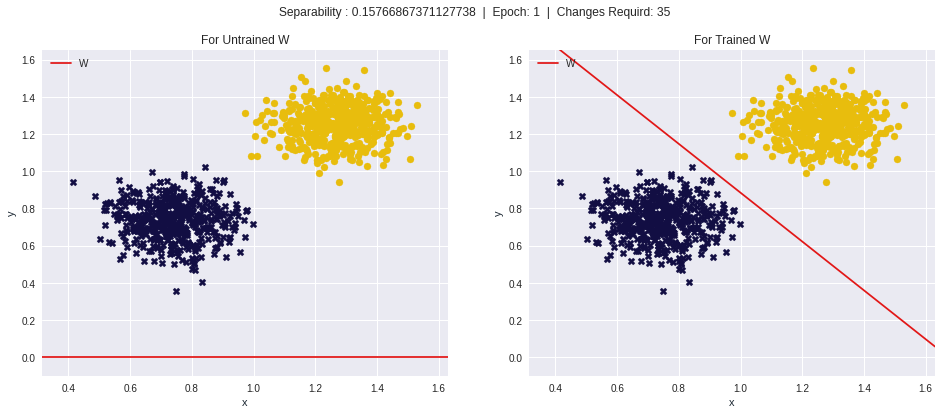

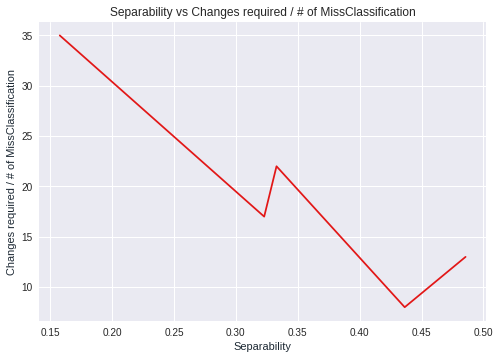

In [11]:
# Generated 5 diffrent mean values
Diff_mu = [0.38-(i*0.03) for i in range(5)]

# To save stats to plot later
stat = []
Img_list = []

CreateGif= False

for i,mu in enumerate(Diff_mu):
  temp = []
  print("_"*130)
  # Generating new data
  D1,D2 = Gen_Data(1-mu,1+mu,0.1)
  X,Y = Gen_XY(D1,D2)

  # Here I have Initialized W with Zeros could go for random also which i did in next question.
  W = torch.zeros(X.size(1))

  # Finding out the separability between 2 data classes
  temp.append(separability(D1,D2))
  print("Separability in Data(γ):" , temp[-1])

  # Training
  W,K,Epoch = Perceptron(X,Y, W, 50)
  print("No of changes required :",K)
  print("No of Epoch required   :",Epoch)

  # If we want to create GIF [please Ignore] 
  if(CreateGif):
    s_name = "Image"+str(i)+".png"
    Img_list.append(s_name)
    Plot_Multi_Graph(X,D1,D2,W,K,Epoch,"Separability : "+str(temp[-1]),s_name)

  # Plot Graph
  Plot_Multi_Graph(X,D1,D2,W,K,Epoch,"Separability : "+str(temp[-1]))

  # Saving Data for a plot later
  temp.append(K)
  stat.append(temp)


# preparing data for plot
stat.sort()
print()
sep = []
changes = []
for sta in stat:
  sep.append(sta[0])
  changes.append(sta[1])

# Separability vs Changes required plot
plt.plot(sep,changes,color='#E21717', label='K')
plt.title("Separability vs Changes required / # of MissClassification")
plt.xlabel('Separability', color='#1C2833')
plt.ylabel('Changes required / # of MissClassification', color='#1C2833')
plt.show()

In [63]:
# To MAKE GIF  [please ignore]

# with imageio.get_writer('mygif.gif', mode='I') as writer:
#     for filename in Img_list:
#         image = imageio.imread(filename)
#         writer.append_data(image)


# Que 2
## Gradient descent for training a linear classifier
[10 = loss formulation 4 + gradient computation 3 + update equation 3]
Consider solving the above problem (training a line for classifying a linearly separable 2D dataset)
using Gradient Descent algorithm. Think of a loss function based on our classroom discussion.
You may implement the analytical way of finding gradient for it. You may implement the basic
version of gradient descent update equation.

# Explanation

* In this problem I am using same data as generated in last iter of previous problem which is clearly linearly seperable.




> Details:
* Loss function Used : Binary Cross Entropy
* Activation : Sigmoid
* Optimizer : Gradient Descent 

---
* This is the Gif I created to show linear boundry at every 25 iteration 
>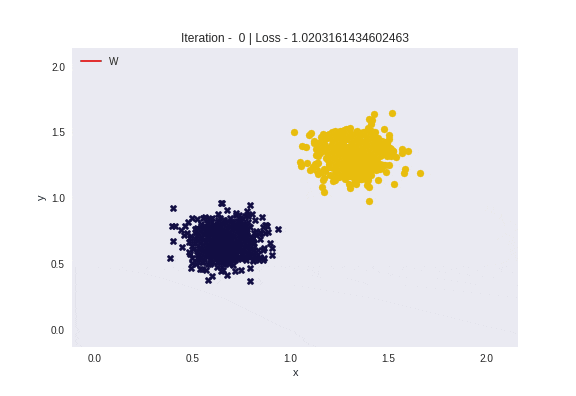

---

* Loss Over Training.
> 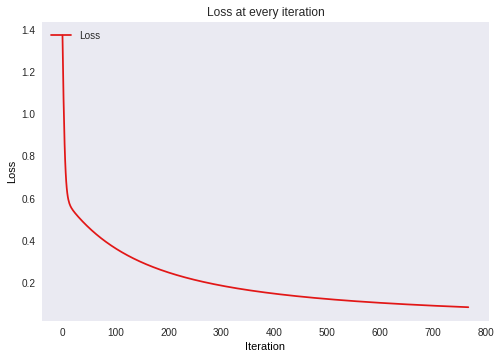

# Code

In [12]:
def Plot_Data(D1,D2,W = None,title = "Plot",Img = "test"):
  """
  This is a Ploting Function i used to plot a graph with and without seperaion boundry.
  """
  # Here I am getting max and min limit from dataset
  ax = min(X[:,0]) - 0.5
  ay = min(X[:,1]) - 0.5
  bx = max(X[:,0]) + 0.5
  by = max(X[:,1]) + 0.5

  # few points in range
  x = np.linspace(ax,bx,50)

  # check for weather to Calculate W [For Seperation boundry]
  if W == None:
    y = np.zeros(50,) 
  else:
    y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())

  # Plot Labels
  plt.title(title)
  plt.xlabel('x', color='#1C2833')
  plt.ylabel('y', color='#1C2833')
  # plt.xlim(ax,bx)
  # plt.ylim(ay,by)
  #Plotting Data
  plt.scatter(D1[:,0], D1[:,1] ,c="#120E43" ,marker='X')
  plt.scatter(D2[:,0], D2[:,1] ,c="#E8BD0D" ,marker='o')

  # check for weather to show W [Seperation boundry]
  if W != None:
    plt.plot(x, y, color='#E21717', label='W')
    plt.legend(loc='upper left')
  
  plt.grid()
  if(Img != "test"):
    plt.savefig(Img)
  
  plt.show()


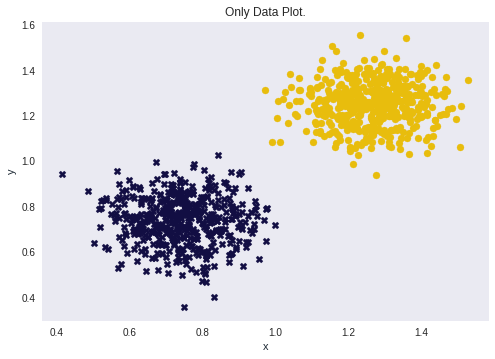

In [13]:
# Here I as using same data as above question [Generated for last iter]

# Because I had one of the lable as -1 in perceptron problem here i am changing it to 0. 
# C{-1,1} ---> C{0,1}
Y[1::2,:2] = 0.0
Plot_Data(D1,D2,title = "Only Data Plot.")

In [14]:
# This are our input shape
print(X.shape,Y.shape)

torch.Size([1000, 3]) torch.Size([1000, 1])


In [15]:
# I have used Binary Cross Entropy as a Loss Function in this problem.
def Cross_Entropy(y_hat, y):
  """
  This is a function that returns the loss from predicted and true value.
  """
  return -((y * torch.log(y_hat)) + ((1-y) * (torch.log(1 - y_hat))))

def Derivative_Cross_Entropy(y_hat, y, x):
  """
  This is a Derivative of function that returns the loss from predicted and true value.
  """
  return (y_hat - y)*x

def sigmoid(z):
  """
  This is a sigmoid fuction.
  """
  return 1 / (1 + torch.exp(-z))

In [16]:
def Eval_Gradiant(w,x,y):
  """
  This is a function which computes the "Gradient" and Loss from the given weights and input, using functions defined in above cell.
  """
  # Setting the loss and gradient to 0
  loss,grad = 0,0
  n = x.size(0)

  # Loop over all the data points in dataset
  for i in range(x.size(0)):

    # predict using currunt W
    y_hat = sigmoid(x[i].dot(w))
    
    # calculate loss and gradiant 
    # i have used this if as fail safe for case where y_hat is 1 and y is 0 log(0) gives nan in a python.
    if(y[i]!=y_hat):
      loss += Cross_Entropy(y_hat,y[i])
      grad += Derivative_Cross_Entropy(y_hat, y[i], x[i])

  # returning the avg loss and gradiant over whole dataset. 
  return (loss/n,grad/n)

def GD(x, y, w, Max_Epochs, n, Loss_List):  
  """
  This is a function which implements simple "Gradient Descent".
  """
  Img_list = []
  cnt = 0;
  prev_loss = 9999999

  # Loop till reaching max number of epoch provided 
  for i in range(Max_Epochs):
    # Calculate Loss and Gradient
    Loss,Grad = Eval_Gradiant(w,x,y)

    # Update the weights by Learning_rate * Gradient
    w = w - n * Grad

    # if Current Loss and Previous Loss only have very small diffrence, means we are almost converge and we can stop.
    if(abs(prev_loss - Loss) <= 0.0001):
      print("-"*50)
      print("Number of epoches taken to converge : %d"%cnt)
      print("-"*50)
      return w;

    # Print Updates every 25 iter.
    if(cnt % 25 == 0):
      print("| Iteration - %3d"%cnt,"| Total Loss - %4.2f"%Loss.item(),"|")

    # To create Gif please ignore
    if(cnt % 25 == 0 and False):
      s_name = "Image"+str(i)+".png"
      Img_list.append(s_name)
      Plot_Data(D1,D2,w,title="Iteration - %2d"%cnt+" | Loss - "+str(Loss.item()),Img = s_name)

    cnt+=1
    prev_loss = Loss 
    # Saving loss for a plot at end
    Loss_List.append(Loss.item())

  # To create Gif Please Ignore
  # with imageio.get_writer('mygif2.gif', mode='I') as writer:
  #   for filename in Img_list:
  #     print(filename)
  #     image = imageio.imread(filename)
  #     writer.append_data(image)

  print("Number of epoches taken to converge [MAX] : %d"%cnt)
  return w


This is a Plot Before Training W, [with randomly assigned W, so W minght not be visible in some cases]
_________________________________________________________________
Untrained W.
tensor([-0.7916, -0.6569, -0.5255])
_________________________________________________________________


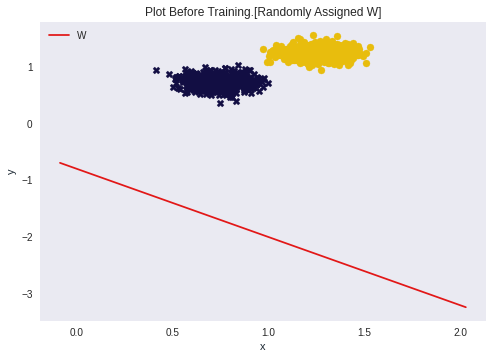

| Iteration -   0 | Total Loss - 0.94 |
| Iteration -  25 | Total Loss - 0.55 |
| Iteration -  50 | Total Loss - 0.47 |
| Iteration -  75 | Total Loss - 0.40 |
| Iteration - 100 | Total Loss - 0.35 |
| Iteration - 125 | Total Loss - 0.31 |
| Iteration - 150 | Total Loss - 0.28 |
| Iteration - 175 | Total Loss - 0.26 |
| Iteration - 200 | Total Loss - 0.23 |
| Iteration - 225 | Total Loss - 0.21 |
| Iteration - 250 | Total Loss - 0.20 |
| Iteration - 275 | Total Loss - 0.19 |
| Iteration - 300 | Total Loss - 0.17 |
| Iteration - 325 | Total Loss - 0.16 |
| Iteration - 350 | Total Loss - 0.15 |
| Iteration - 375 | Total Loss - 0.15 |
| Iteration - 400 | Total Loss - 0.14 |
| Iteration - 425 | Total Loss - 0.13 |
| Iteration - 450 | Total Loss - 0.13 |
| Iteration - 475 | Total Loss - 0.12 |
| Iteration - 500 | Total Loss - 0.12 |
| Iteration - 525 | Total Loss - 0.11 |
| Iteration - 550 | Total Loss - 0.11 |
| Iteration - 575 | Total Loss - 0.10 |
| Iteration - 600 | Total Loss - 0.10 |


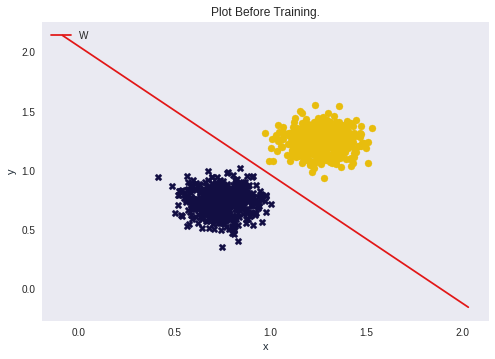

_________________________________________________________________
Trained W.%d
tensor([-5.3303, -4.9213, 10.0706])
_________________________________________________________________


In [17]:
# Initialization of Variables
Loss_List = []

# Learning Rate
n = 0.5

# Max Epoch Limit
Max_Epochs = 1000

# Randmoly assigned weights
W = torch.rand(X.size(1)) * -1

# Plot Before Training
print("This is a Plot Before Training W, [with randomly assigned W, so W minght not be visible in some cases]")
print("_"*65,"Untrained W.",W,"_"*65 , sep = '\n')
Plot_Data(D1,D2,W, title = "Plot Before Training.[Randomly Assigned W]")

# Training  
W = GD(X,Y,W,Max_Epochs,n,Loss_List)

print("_"*65,"This is a Plot After Training W.","_"*65 , sep = '\n')
Plot_Data(D1,D2,W,title = "Plot Before Training.")
print("_"*65,"Trained W.%d",W,"_"*65 , sep = '\n')


_________________________________________________________________
This is Plot of Loss vs Iteration taken to converge
_________________________________________________________________


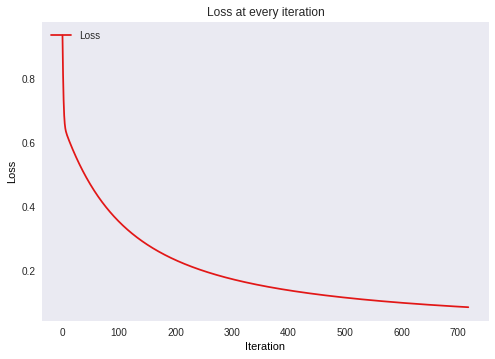

In [18]:
# Plotting Loss over Training.
print("_"*65)
print("This is Plot of Loss vs Iteration taken to converge")
print("_"*65)
axisx = range(len(Loss_List))
plt.plot(axisx , Loss_List, color='#E21717', label='Loss')
plt.title('Loss at every iteration')
plt.xlabel('Iteration', color='#000000')
plt.ylabel('Loss', color='#000000')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Que 3
## MLP with a single hidden layer
[20 = dataset creation 3 + MLP definition 3 + backprop 10 + elegance/recursion 4]
Consider a binary classification dataset that is not linearly separable in 2D (e.g. data lying on the
circumference two concentric circles). Train a Multi layer perceptron (MLP) with a single hidden
layer for classifying the same. You may use the loss function used in problem 2. You have to
implement the gradient descent (i.e. backpropagation) algorithm yourself.

# Explanation


## MLP

### Here I'll try to show the approach i have taken to implement this and derivation i have did or resource i have folllowed 
---

* So, my network looks something like this.
* I have annotated the location in graph with variable names to understand it well
* 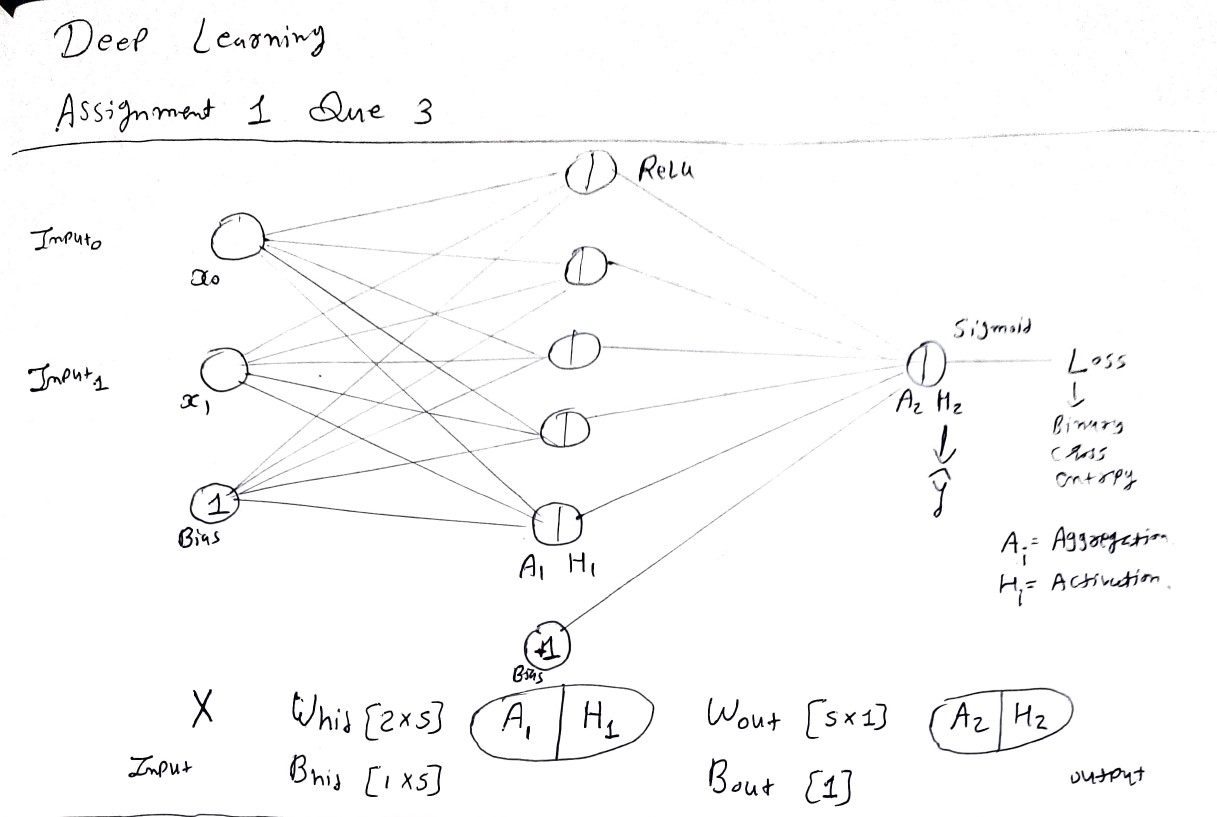
---
* This is the derivation for Output Layer
* 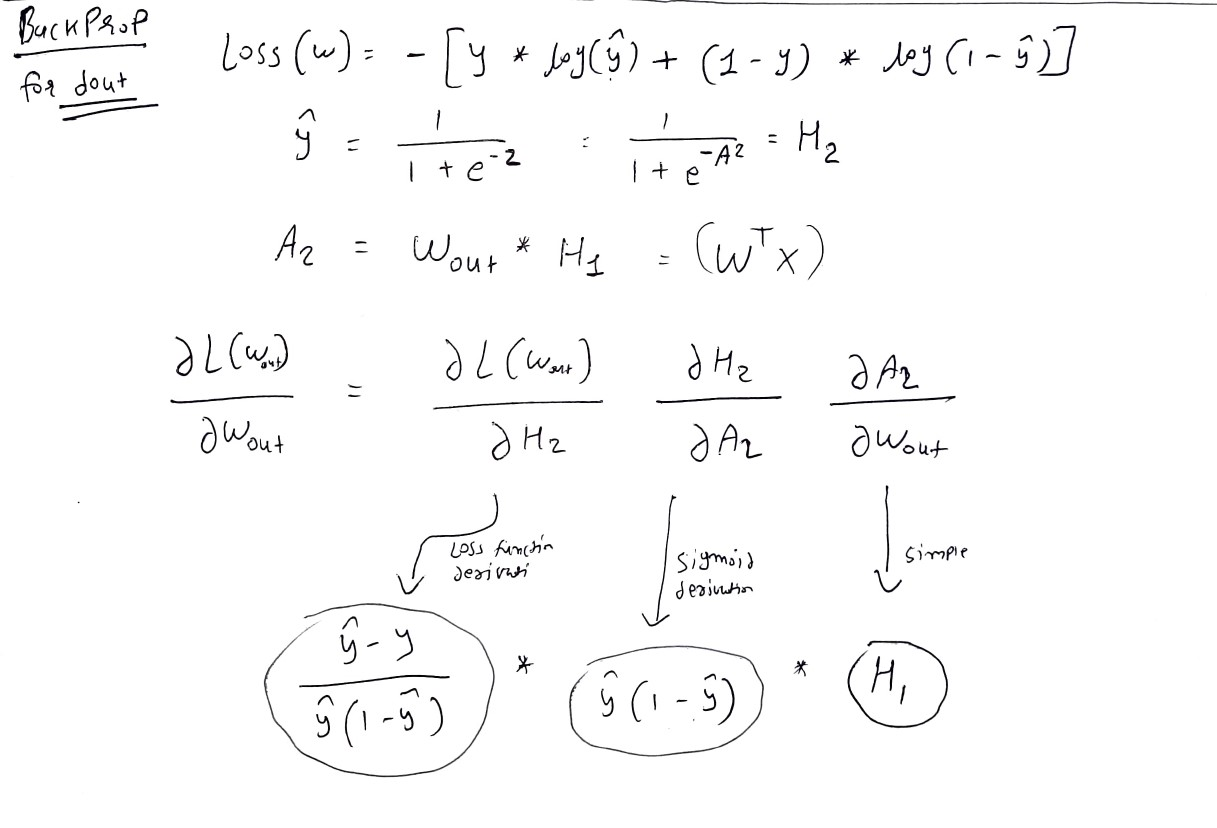


---
* This is the derivation for Hidden Layer
* 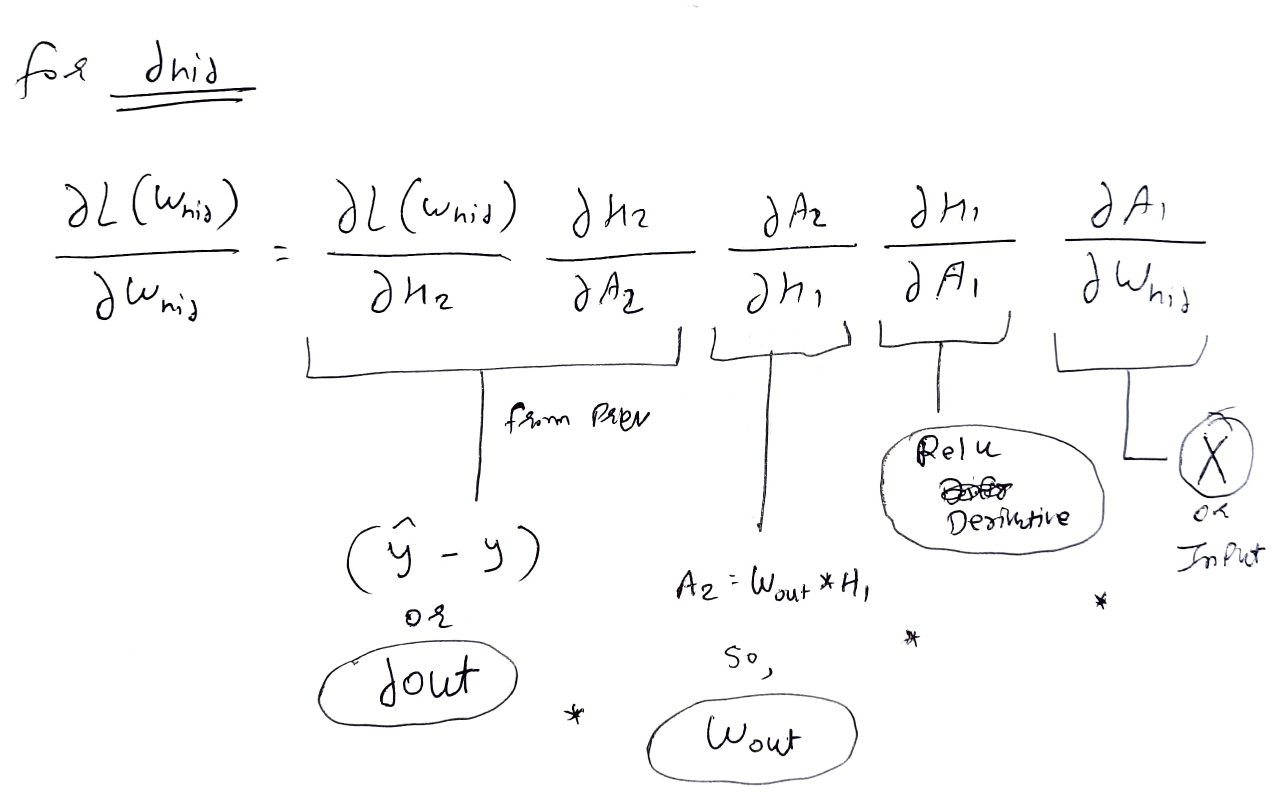
---
# Details about functions i used
* I have Used Binary Cross Entropy as loss function.
* 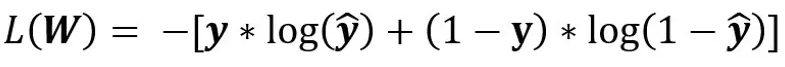
* Sigmoid as activation for output layer. 
* 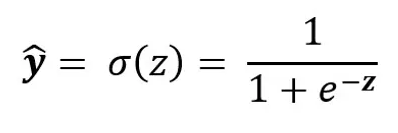
* Relu as activation for Hidden layer.
* 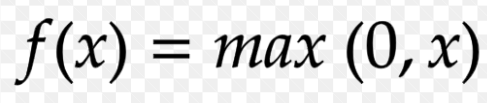
---
* Here I have put link to Binary cross entropy derivation which i found helpful 
* https://www.python-unleashed.com/post/derivation-of-the-binary-cross-entropy-loss-gradient
---

# Code

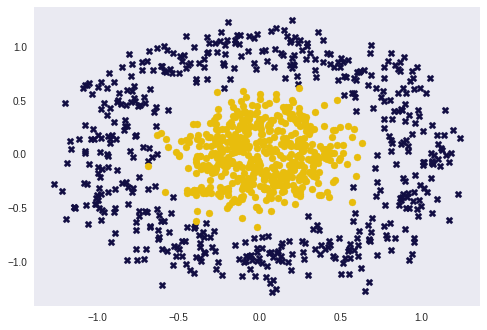

In [19]:
# I have taken data as suggested in question : (e.g. data lying on the circumference two concentric circles).
def Create_Dataset():
  x, y = sklearn.datasets.make_circles(n_samples=1000, factor=0.3, noise=0.15)
  
  # indices of class 0
  zero = np.where(y == 0)
  # indices of class 1
  one = np.where(y == 1)

  # creating tensors
  D3 = torch.tensor(x[zero])
  D4 = torch.tensor(x[one])

  return D3, D4

# creating Non linear dataset
D3, D4 = Create_Dataset()

# plotting Data
plt.scatter(D3[:,0], D3[:,1] ,c="#120E43" ,marker='X')
plt.scatter(D4[:,0], D4[:,1] ,c="#E8BD0D" ,marker='o')
plt.grid()
plt.show()

In [20]:
# Creating X as input set
XX=torch.empty(1000,D3.size(1)).fill_(1)
XX[::2,:2] = D3
XX[1::2,:2] = D4
print(XX.shape)
print(XX[0])
print()

# Creating Y as Label set
YY=torch.empty(1000,1)
YY[::2,:1] = 1.0
YY[1::2,:1] = 0.0
print(YY.shape)
print(YY[0])

torch.Size([1000, 2])
tensor([-0.4073, -0.6934])

torch.Size([1000, 1])
tensor([1.])


In [21]:
from sklearn.model_selection import train_test_split

# Splitting X & Y into test and train set 
# I have Taken:  | 66.66% Train | 33.33% Test |

X, X_test, Y, y_test = train_test_split(XX, YY, test_size=0.33, random_state=0)
# Train Prediction store place in orded to check train acc later
Y_hat=torch.empty(Y.shape[0],1)

In [22]:
# This are the activation function and their derivation i have used in this problem
def Relu(x):
  x[x<0] = 0
  return x

def Relu_der(x):
  mask_arr = (x>=0).to(int)
  return np.multiply(x,mask_arr)

def Sigmoid(x):
  return 1/(1+ torch.exp(- x))

def Sigmoid_der(x):
  return  1/(1+ torch.exp(- x))*(1-1/(1+ torch.exp(- x)))

def Cross_Entropy(y_hat, y):
  # I have used this if as fail safe for case where y_hat is 1 and y is 0 log(0) gives nan in a python.
  if(y!=y_hat):
    return -((y * torch.log(y_hat)) + ((1-y) * (torch.log(1 - y_hat))))
  return 0

# Here I have initialized the size of diffrent layers
inp = X.shape[1]
hidden = 5
out = 1

# This is learning rate
l = 0.01
Max_Epochs = 1000

# Here I have initialized Weights and bias randomly
Whid = torch.rand(hidden,inp)   # matrix
Bhid = torch.rand(hidden)       # vector
WOut = torch.rand(hidden)       # vector
BOut = torch.rand(out)          # constant

# List to save the loss at each data point at every iteration 
Lost_List = []
TotError_List = []

prevError = 9999999

# Here I have Implemented SGD to optimize Whid,Bhid,WOut,BOut.
# Loop till reaching Max_Epochs 
for Epoch in range(Max_Epochs):
  TotError = 0
  # Loop over whole dataset 
  for I in range(0, X.shape[0]):
    # Feed Forward 
    H1 = Relu(torch.matmul(Whid,X[I])+Bhid)
    Y_hat[I] = Sigmoid(torch.dot(WOut,H1)+BOut)

    # Caculating Error using Cross_Entropy
    ERROR = Cross_Entropy(Y_hat[I],Y[I])
    Lost_List.append(ERROR.item())

    # Adding it to total error
    TotError += ERROR
    
    # Finding Derivative as shown in the above explanation 
    dOut = Y_hat[I]-Y[I]
    dhid = dOut * WOut * Relu_der(H1)

    # Updating WOut | here H1 is derivative wite respect to WOut(weights).
    WOut -= l * dOut * H1
    BOut -= l * dOut

    # Updating Whid 
    # Here I have used torch.kron in order to multiply X[I] with each value of dhid(derivative)
    # because output of kron is flat vector we reshape it appropriately. 
    # This is shown for 4 nurone in hidden layer
    # --------------------------------------------------
    # dhid = tensor([0.3337, 0.4193, 0.0305, 0.1139])
    # X[I] = tensor([ 0.0839, -0.2220])
    # --------------------------------------------------
    # kron(dhid,X[I]) = tensor([[ 0.0280, -0.0741],
    #                            [ 0.0352, -0.0931],
    #                            [ 0.0026, -0.0068],
    #                            [ 0.0096, -0.0253]])
    Whid -= l * torch.kron(dhid, X[I]).reshape(hidden, X[I].shape[0])
    Bhid -= l * dhid

  # This is a early stop condition when loss diffrence is less than 0.01 between last and current loss
  if(abs(prevError-TotError) < 0.01):
    print("-"*100)
    print("Early stopping at iter:",Epoch)
    break;

  # Printing Loss Every 20 epoch
  if(Epoch % 20 == 0):
    print("| Iteration - %3d"%Epoch,"| Total Loss:%4.2f"%TotError.item(),"|")
  
  # Updating previous loss
  prevError = TotError
  TotError_List.append(TotError.item())


| Iteration -   0 | Total Loss:468.81 |
| Iteration -  20 | Total Loss:281.25 |
| Iteration -  40 | Total Loss:68.97 |
| Iteration -  60 | Total Loss:47.90 |
| Iteration -  80 | Total Loss:43.92 |
----------------------------------------------------------------------------------------------------
Early stopping at iter: 90


_________________________________________________________________
This is Plot of Total Loss at every epoch vs epoch taken to converge
_________________________________________________________________


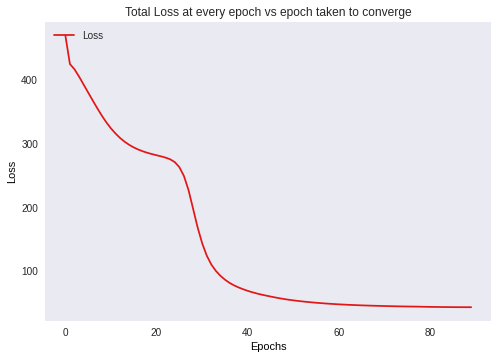

In [23]:
# Plotting Loss over Training.
print("_"*65)
print("This is Plot of Total Loss at every epoch vs epoch taken to converge")
print("_"*65)
axisx = range(len(TotError_List))
plt.plot(axisx , TotError_List, color='#E21717', label='Loss')
plt.title('Total Loss at every epoch vs epoch taken to converge')
plt.xlabel('Epochs', color='#000000')
plt.ylabel('Loss', color='#000000')
plt.legend(loc='upper left')
plt.grid()
plt.show()


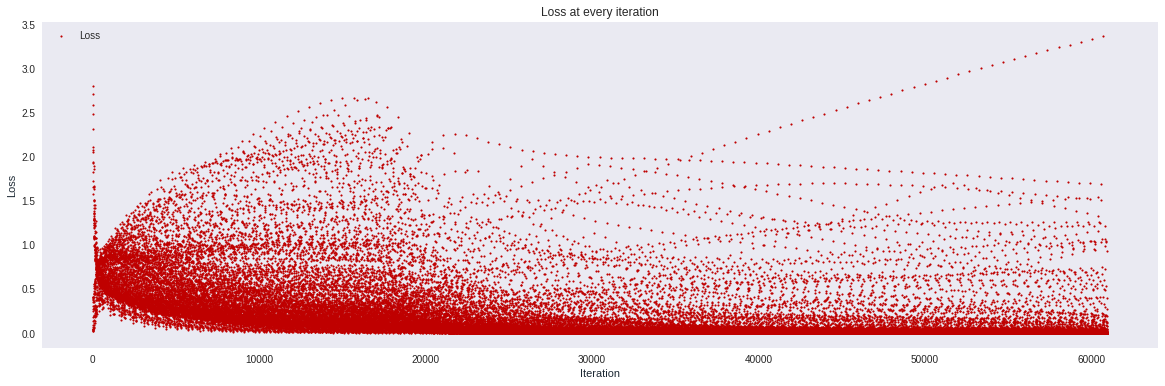

In [24]:
# Here I am plotting the loss for each data point at every epoch
# looking at this we can see loss going down for majority of the points in the traing set, ofcourse with some outliers.

axisx = range(len(Lost_List))
plt.figure(figsize=(20,6))
plt.scatter(axisx,Lost_List, color='#bf0000', label='Loss', s=3)
plt.title('Loss at every iteration')
plt.xlabel('Iteration', color='#1C2833')
plt.ylabel('Loss', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [25]:
def predict(x,Whid,Bhid,WOut,BOut):
  """
  This is the Function which do the forward pass using trained perameters, and returns predicted value as y_hat.
  """
  H1 = Relu(torch.matmul(Whid,x)+Bhid)
  Y_hat = Sigmoid(torch.dot(WOut,H1)+BOut)
  return Y_hat

# Defining empty tesor to store predictions
Y_pred=torch.empty(X_test.shape[0],1)
# Predicting Values
for i,x in enumerate(X_test):
  Y_pred[i] = predict(x,Whid,Bhid,WOut,BOut) 

In [26]:
# Here I am Thresolding the prediction by 0.5 because it's binary classification
Y_pred[Y_pred>0.5] = 1
Y_pred[Y_pred<=0.5] = 0
Y_hat[Y_hat>0.5] = 1
Y_hat[Y_hat<=0.5] = 0

# Calculating Accuracy
Accuracy = ( 100 * torch.sum(Y_hat == Y)) / X.shape[0]
print("Accuracy on Train set: %2.2f"%Accuracy.item(),"%")

Accuracy = ( 100 * torch.sum(Y_pred == y_test)) / X_test.shape[0]
print("Accuracy on Test  set: %2.2f"%Accuracy.item(),"%")

Accuracy on Train set: 97.31 %
Accuracy on Test  set: 96.36 %


Note❗ : Please prefer to do Run All, rather then running each cell because in all 3 problem there is some common variable names.

---
<center><h1><B>   Thank You. </h1></B></center>

---